<a href="https://colab.research.google.com/github/azastron/ML_NeuralNetworks/blob/main/HW5_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the first task of Homework 5 of Andreas Muller course on Applied Machine Learning offered at Columbia during the Spring 2020 semester.
### Task 1
Run a multilayer perceptron (a densely connected feed forward neural network) with two hidden layers and rectified linear nonlinearities on the digits dataset from sklearn using the keras Sequential interface. Include code for selecting L2 regularization strength and number of hidden units using GridSearchCV and evaluation on an independent test-set.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [15]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

<Figure size 432x288 with 0 Axes>

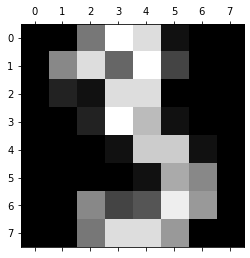

In [11]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[3]) 
plt.show() 

In [27]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

In [22]:
for train_index, test_index in sss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  #print("TRAIN:", train_index, "TEST:", test_index)

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

In [33]:
def make_model(optimizer="adam", hidden_size=32):
  model = Sequential([Dense(hidden_size, input_shape=(64,)),
                      Activation('relu'),
                      Dense(10),
                      Activation('softmax')])
  model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
  return model

In [34]:
clf = KerasClassifier(make_model)
param_grid = {'epochs': [1, 5, 10],
              'hidden_size': [32, 64, 256]}
grid = GridSearchCV(clf, param_grid = param_grid)
grid.fit(X_train, y_train)

9/9 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8432
Epoch 1/5
36/36 [==============================] - 0s 2ms/step - loss: 6.3304 - accuracy: 0.1506
Epoch 2/5
36/36 [==============================] - 0s 2ms/step - loss: 2.4058 - accuracy: 0.3864
Epoch 3/5
36/36 [==============================] - 0s 2ms/step - loss: 1.2570 - accuracy: 0.6084
Epoch 4/5
36/36 [==============================] - 0s 2ms/step - loss: 0.7779 - accuracy: 0.7441
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.8264
Epoch 1/5
36/36 [==============================] - 0s 2ms/step - loss: 5.2943 - accuracy: 0.1897
Epoch 2/5
36/36 [==============================] - 0s 2ms/step - loss: 2.0756 - accuracy: 0.3908
Epoch 3/5
36/36 [==============================] - 0s 3ms/step - loss: 1.1352 - accuracy: 0.6562
Epoch 4/5
36/36 [==============================] - 0s 2ms/step - loss: 0.7777 - accuracy: 0.7676
Epoch 5/5
9/9 [=============================

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa647387f28>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
score = grid.score(X_test, y_test)
print("Test-set score: {:.3f}".format(score))

12/12 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9722
Test-set score: 0.972
